In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model, load_model
import numpy as np

/Users/sammamsohail/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

## Preprocessing data and splitting
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_path = 'dataset/'

train_dataset = train_datagen.flow_from_directory(train_path, 
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

test_dataset = train_datagen.flow_from_directory(train_path, 
                                           target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')

Found 70306 images belonging to 38 classes.
Found 17561 images belonging to 38 classes.


In [27]:
model = models.Sequential()    ## setup model

## add layers
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(train_dataset.num_classes, activation='sigmoid')) ## output layer

model.summary()

/Users/sammamsohail/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 63, 63, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,734 (2.01 MB)

 Trainable params: 525,350 (2.00 MB)

 Non-trainable params: 384 (1.50 KB)

In [28]:
model.compile(optimizer='adam',         ## model compilation 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(    ## model training
    train_dataset,
    epochs=4,
    verbose=1
)

Epoch 1/4
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 282s 127ms/step - accuracy: 0.3914 - loss: 2.1509
Epoch 2/4
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1155s 525ms/step - accuracy: 0.7279 - loss: 0.8760
Epoch 3/4
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 282s 128ms/step - accuracy: 0.8119 - loss: 0.5925
Epoch 4/4
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1089s 495ms/step - accuracy: 0.8448 - loss: 0.4986


In [34]:
model.save('model2.h5')

In [11]:
model = load_model('model2.h5')

2024-08-08 19:02:28.165567: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-08-08 19:02:28.165600: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-08 19:02:28.165607: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-08 19:02:28.165626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-08 19:02:28.165639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Model Testing

In [12]:
import numpy as np

predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

/Users/sammamsohail/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-08 19:02:28.751659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


549/549 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step


In [13]:
from sklearn.metrics import accuracy_score

true_labels = test_dataset.classes
accuracy = accuracy_score(true_labels, predicted_classes)
print('Accuracy:', accuracy)

Accuracy: 0.8736404532771482


In [14]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       504
           1       0.95      0.93      0.94       496
           2       0.96      0.90      0.93       440
           3       0.89      0.90      0.90       502
           4       0.90      0.92      0.91       454
           5       0.91      0.96      0.94       420
           6       0.92      0.96      0.94       456
           7       0.86      0.76      0.80       410
           8       0.96      0.94      0.95       476
           9       0.90      0.88      0.89       477
          10       0.94      1.00      0.97       464
          11       0.55      0.98      0.71       472
          12       0.92      0.44      0.59       480
          13       0.82      0.90      0.86       430
          14       0.87      0.99      0.93       423
          15       0.87      0.98      0.92       502
          16       0.88      0.84      0.86       459
          17       0.95    

## ROC-AUC curve

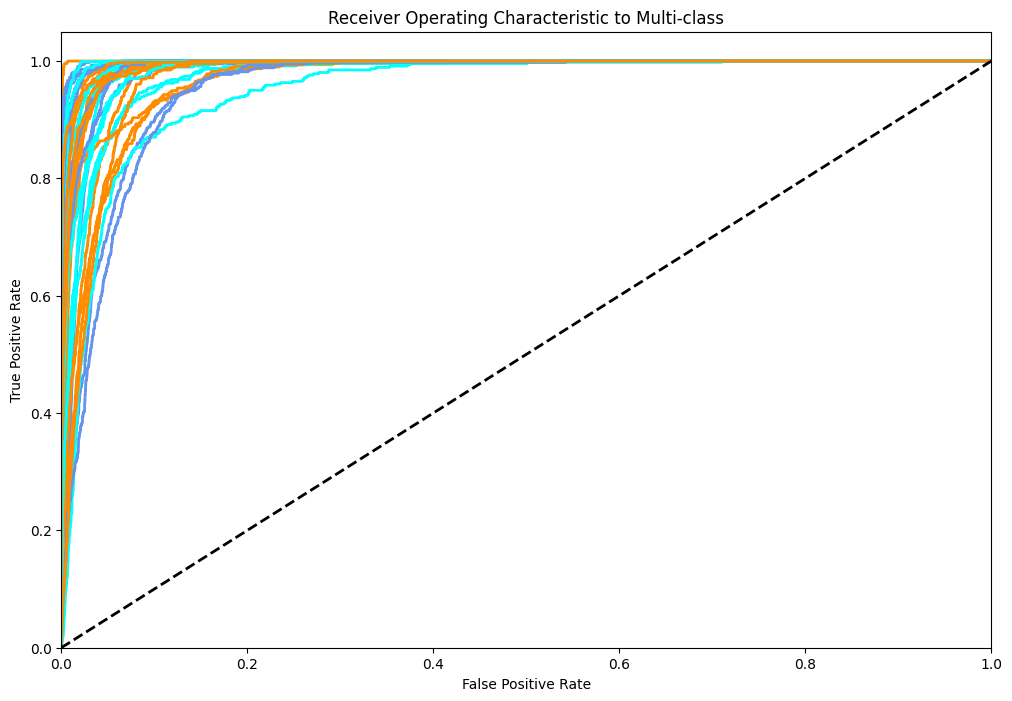

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

def plot_roc_auc(y_true, y_pred_proba, n_classes):
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(12, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic to Multi-class')
    plt.show()

plot_roc_auc(test_dataset.classes, predictions, test_dataset.num_classes)